# Importaciones

In [ ]:
import pandas as pd
import numpy as npç
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow as tf
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Definir conjunto de entrenamiento


In [ ]:
df = pd.read_csv('/content/WineQT.csv')
df = df.drop('Id', axis = 1)

In [ ]:
x_wines = df.drop('quality', axis = 1)
y_wines = df['quality']
y_wines

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [ ]:
y_wines

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x_wines,y_wines, random_state=1, test_size=0.25)

# Definir el modelo de red neuronal

In [ ]:
x_train.shape

(857, 11)

In [ ]:
input_sh = x_train.shape[1]

model = keras.Sequential([
        keras.layers.Dense(32, activation = 'relu', input_dim=input_sh),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.Dense(9, activation = 'relu')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                384       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 9)                 153       
                                                                 
Total params: 1,065
Trainable params: 1,065
Non-trainable params: 0
_________________________________________________________________


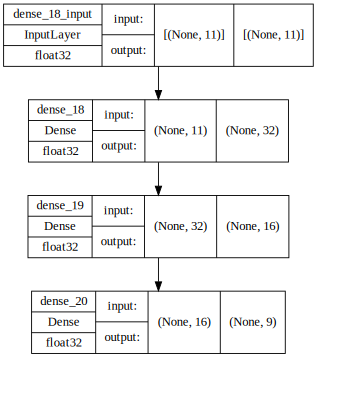

In [ ]:
SVG(model_to_dot(model,show_shapes=True, show_dtype=True, dpi = 65).create(prog = 'dot', format = 'svg'))

# Configurar el proceso de aprendizaje

In [ ]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'] )

# Entrenar el modelo

In [ ]:
model.fit(x_train,y_train, batch_size=10, epochs=15)

Epoch 1/15
86/86 [==============================] - 1s 2ms/step - loss: 4.0643 - accuracy: 0.0023
Epoch 2/15
86/86 [==============================] - 0s 2ms/step - loss: 2.2166 - accuracy: 0.0035
Epoch 3/15
86/86 [==============================] - 0s 2ms/step - loss: 2.1981 - accuracy: 0.0012
Epoch 4/15
86/86 [==============================] - 0s 2ms/step - loss: 2.1971 - accuracy: 0.0012
Epoch 5/15
86/86 [==============================] - 0s 2ms/step - loss: 2.1548 - accuracy: 0.1155
Epoch 6/15
86/86 [==============================] - 0s 2ms/step - loss: 1.6404 - accuracy: 0.4457
Epoch 7/15
86/86 [==============================] - 0s 2ms/step - loss: 1.3734 - accuracy: 0.4842
Epoch 8/15
86/86 [==============================] - 0s 1ms/step - loss: 1.3749 - accuracy: 0.4772
Epoch 9/15
86/86 [==============================] - 0s 2ms/step - loss: 1.3600 - accuracy: 0.5018
Epoch 10/15
86/86 [==============================] - 0s 2ms/step - loss: 1.3520 - accuracy: 0.5006
Epoch 11/15
86/86 [

# Evaluar el modelo

In [ ]:
score = model.evaluate(x_test,y_test, verbose = 0)
print('Test loss:', score [0])
print('Test accuracy:', score [1])

Test loss: 1.287857174873352
Test accuracy: 0.5839160680770874


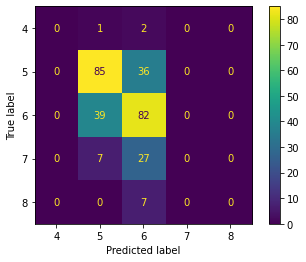

In [ ]:
prediction = model.predict(x_test)
y_pred = prediction.argmax(axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)